In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
res=pd.read_csv("./model_history_log.csv")
res = res.drop(0)
res.head()

,epoch,accuracy,auc,loss,precision,recall,val_accuracy,val_auc,val_loss,val_precision,val_recall
1,0,0.625811,0.666817,0.754519,0.628069,0.618951,0.616250,0.742260,0.736115,0.724723,0.369588
2,1,0.683280,0.746915,0.609514,0.686489,0.675916,0.641444,0.763560,0.708848,0.756326,0.412809
3,2,0.708282,0.781397,0.564249,0.708900,0.707854,0.662449,0.780302,0.713620,0.778338,0.450217
4,3,0.728359,0.806041,0.535637,0.727662,0.730813,0.685653,0.798112,0.696477,0.792138,0.499742
5,4,0.742195,0.823432,0.515127,0.740490,0.746587,0.706402,0.815064,0.668044,0.805397,0.541001


In [50]:
f1score = []
val_f1score = []
for index, row in res.iterrows():
    precision, recall = row["precision"], row["recall"]
    f1 = 2*precision*recall/(precision+recall)
    f1score.append(f1)
    
    val_precision, val_recall = row["val_precision"], row["val_recall"]
    val_f1 = 2*val_precision*val_recall/(val_precision+val_recall)
    val_f1score.append(val_f1)
    
res["f1"] = f1score
res["val_f1"] = val_f1score
res.head()

,epoch,accuracy,auc,loss,precision,recall,val_accuracy,val_auc,val_loss,val_precision,val_recall,f1,val_f1
1,0,0.625811,0.666817,0.754519,0.628069,0.618951,0.616250,0.742260,0.736115,0.724723,0.369588,0.623476,0.489530
2,1,0.683280,0.746915,0.609514,0.686489,0.675916,0.641444,0.763560,0.708848,0.756326,0.412809,0.681161,0.534101
3,2,0.708282,0.781397,0.564249,0.708900,0.707854,0.662449,0.780302,0.713620,0.778338,0.450217,0.708377,0.570461
4,3,0.728359,0.806041,0.535637,0.727662,0.730813,0.685653,0.798112,0.696477,0.792138,0.499742,0.729234,0.612851
5,4,0.742195,0.823432,0.515127,0.740490,0.746587,0.706402,0.815064,0.668044,0.805397,0.541001,0.743526,0.647239


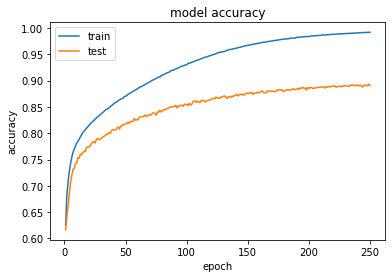

In [51]:
plt.plot(res['accuracy'])
plt.plot(res['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

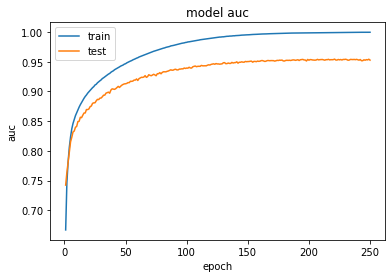

In [52]:
plt.plot(res['auc'])
plt.plot(res['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

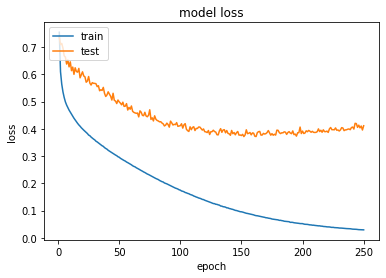

In [53]:
plt.plot(res['loss'])
plt.plot(res['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

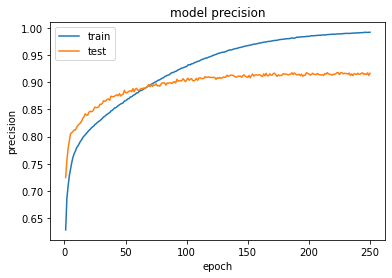

In [54]:
plt.plot(res['precision'])
plt.plot(res['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

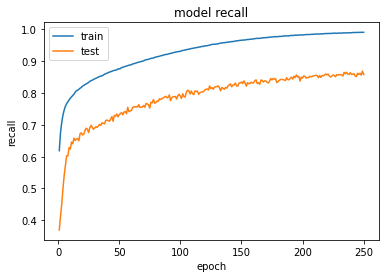

In [57]:
plt.plot(res['recall'])
plt.plot(res['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

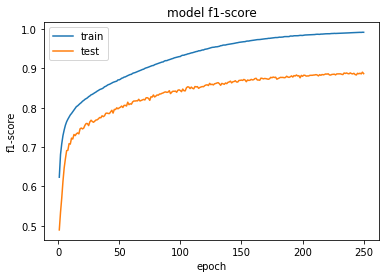

In [58]:
plt.plot(res['f1'])
plt.plot(res['val_f1'])
plt.title('model f1-score')
plt.ylabel('f1-score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [74]:
from tabulate import tabulate
tmp = [(250, res.loc[250]["val_accuracy"], res.loc[250]["val_auc"], res.loc[250]["val_loss"], res.loc[250]["val_precision"], res.loc[250]["val_recall"], res.loc[250]["val_f1"])]
title = ["epoch", "test_accuracy", "test_auc", "test_loss", "test_precision", "test_recall", "test_f1"]
print(tabulate(tmp, headers=title))

  epoch    test_accuracy    test_auc    test_loss    test_precision    test_recall    test_f1
-------  ---------------  ----------  -----------  ----------------  -------------  ---------
    250         0.890662    0.952663     0.411399           0.91661       0.858489   0.886598
